# Load model 

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import segmentation_models as sm
from visualise import show_two, show
from dataset import load_dataset, split_dataset_paths

Segmentation Models: using `tf.keras` framework.


## Prepare dataset

In [2]:
IMAGE_SIZE = [448, 640]

In [3]:
GCS_PATTERN = 'gs://padnet-data/freiburg/tfr/*.tfr'
paths = tf.io.gfile.glob(GCS_PATTERN)
PARALLEL_OPS = None

In [4]:
TRAIN_RATIO = 0.7
VALIDATION_RATIO = 0.15
train_paths, validate_paths, test_paths = split_dataset_paths(paths, TRAIN_RATIO, VALIDATION_RATIO)
print(f"Found {len(paths)} tfrs. Splitting into {len(train_paths)} training, {len(validate_paths)} validation, and {len(test_paths)} test tfrs")

Found 230 tfrs. Splitting into 161 training, 34 validation, and 35 test tfrs


## Load dataset

In [5]:
test_dataset = load_dataset(test_paths, IMAGE_SIZE, PARALLEL_OPS)

In [6]:
test_lst = list(test_dataset)

In [7]:
NBRO_TEST_CASES = 5

In [8]:
test_sample_rgbs, test_sample_gts = zip(*test_lst[:NBRO_TEST_CASES])

## Load model

In [9]:
model = tf.keras.models.load_model('./test_save.h5', compile=False)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, None, None, 4 1080        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, None, None, 4 160         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, None, None, 4 0           stem_bn[0][0]                    
______________________________________________________________________________________________

block6f_project_bn (BatchNormal (None, None, None, 2 928         block6f_project_conv[0][0]       
__________________________________________________________________________________________________
block6f_drop (FixedDropout)     (None, None, None, 2 0           block6f_project_bn[0][0]         
__________________________________________________________________________________________________
block6f_add (Add)               (None, None, None, 2 0           block6f_drop[0][0]               
                                                                 block6e_add[0][0]                
__________________________________________________________________________________________________
block7a_expand_conv (Conv2D)    (None, None, None, 1 322944      block6f_add[0][0]                
__________________________________________________________________________________________________
block7a_expand_bn (BatchNormali (None, None, None, 1 5568        block7a_expand_conv[0][0]        
__________

## Predict

In [11]:
predictions = model(np.asarray(test_sample_rgbs))

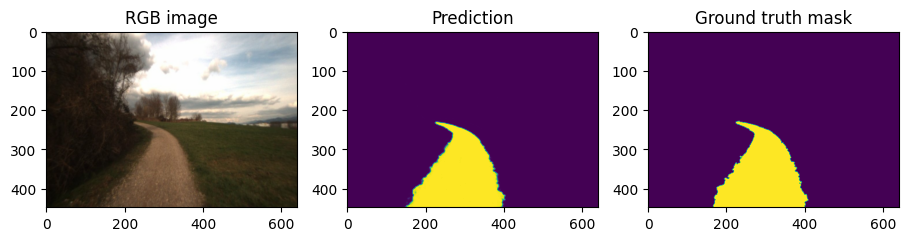

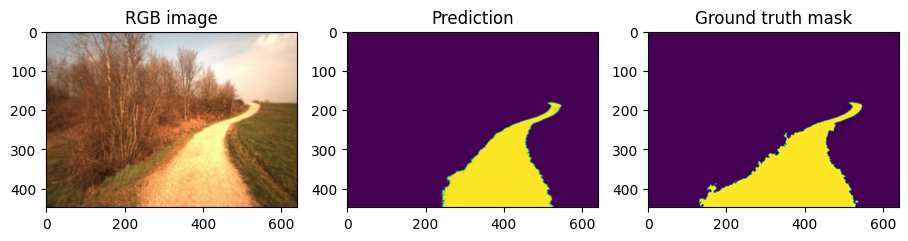

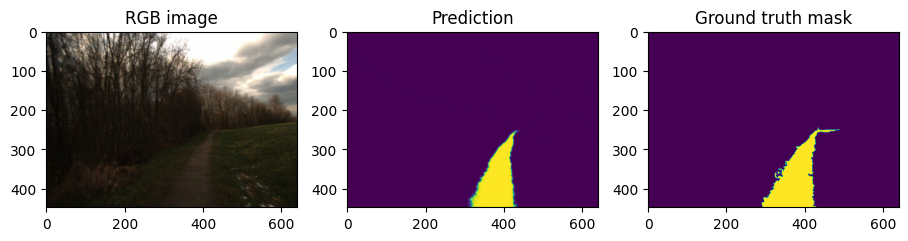

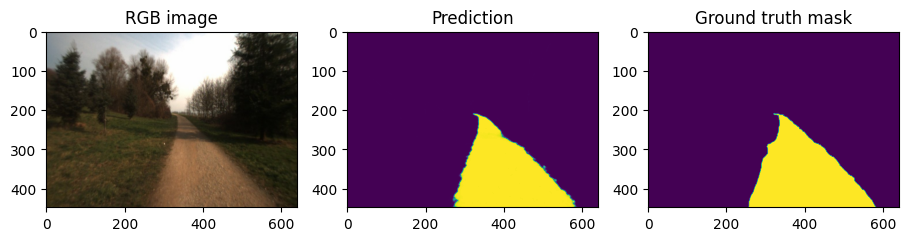

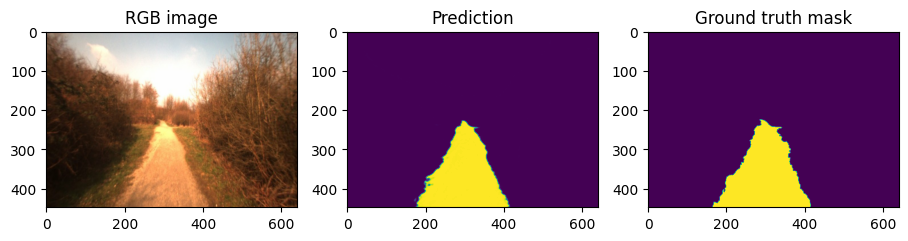

In [12]:
for test_sample_rgb, prediction, test_sample_gt in zip(test_sample_rgbs, predictions, test_sample_gts):
    show({
        "RGB image": test_sample_rgb,
        "Prediction": prediction,
        "Ground truth mask": test_sample_gt
    })